<a href="https://www.kaggle.com/code/victorluizroman/titanic?scriptVersionId=242165781" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set_palette("pastel")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


/tmp/ipykernel_13/3441798085.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
'''
Data Dictionary:
Variable   Definition	                                Key

survival   Survival	                                    0 = No, 1 = Yes
pclass	   Ticket class	                                1 = 1st, 2 = 2nd, 3 = 3rd
sex	       Sex	                                        
Age	       Age in years	                                 
sibsp	   # of siblings / spouses aboard the Titanic   
parch	   # of parents / children aboard the Titanic	
ticket	   Ticket number	                             
fare	   Passenger fare	                             
cabin	   Cabin number	                                 
embarked   Port of Embarkation	                        C = Cherbourg, Q = Queenstown, S = Southampton



Variable Notes:
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
'''

'\nData Dictionary:\nVariable   Definition\t                                Key\n\nsurvival   Survival\t                                    0 = No, 1 = Yes\npclass\t   Ticket class\t                                1 = 1st, 2 = 2nd, 3 = 3rd\nsex\t       Sex\t                                        \nAge\t       Age in years\t                                 \nsibsp\t   # of siblings / spouses aboard the Titanic   \nparch\t   # of parents / children aboard the Titanic\t\nticket\t   Ticket number\t                             \nfare\t   Passenger fare\t                             \ncabin\t   Cabin number\t                                 \nembarked   Port of Embarkation\t                        C = Cherbourg, Q = Queenstown, S = Southampton\n\n\n\nVariable Notes:\npclass: A proxy for socio-economic status (SES)\n1st = Upper\n2nd = Middle\n3rd = Lower\n\nage: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\n\nsibsp: The dataset defines family relations

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:
train['Name'] = train['Name'].str.replace(' ([A-Za-z]+)\.', '', regex=True)

In [11]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [14]:
def impute_by_distribution(row):
    if pd.isnull(row['Age']):
        ages = train[train['Title'] == row['Title']]['Age']
        prob_dist = ages.value_counts(normalize=True)
        return np.random.choice(prob_dist.index, p=prob_dist.values)
    else:
        return row['Age']

train['Age'] = train.apply(impute_by_distribution, axis=1)

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [16]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [17]:
most_frequent_embarked_pclass1 = train[(train['Pclass'] == 1) & (train['Embarked'].notnull())]['Embarked'].mode()[0]
train['Embarked'].fillna(most_frequent_embarked_pclass1, inplace=True)

/tmp/ipykernel_13/754059872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(most_frequent_embarked_pclass1, inplace=True)


In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [19]:
bins = [0, 12, 18, 60, 100]  
labels = ['Child (0-12)', 'Teenager (13-17)', 'Adult (18-59)', 'Senior (60+)']  
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)  

In [20]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

In [21]:
train['IsAlone'] = (train['FamilySize']==1).astype(int)

In [22]:
train['HasChildren'] = ((train['Age'] >= 18) & (train['Parch'] > 0)).astype(int)  

In [23]:
train['ImmediateFamily'] = ((train['SibSp'] > 0) | (train['Parch'] > 0)).astype(int)  

In [24]:
train['FamilyGroup'] = train['Ticket'].astype(str) + '_' + train['Embarked'].astype(str)

In [25]:
train['ChildWithNanny'] = ((train['Age'] < 18) & (train['Parch'] == 0)).astype(int)  

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeGroup,FamilySize,IsAlone,HasChildren,ImmediateFamily,FamilyGroup,ChildWithNanny
0,1,0,3,"Braund, Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult (18-59),2,0,0,1,A/5 21171_S,0
1,2,1,1,"Cumings, John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult (18-59),2,0,0,1,PC 17599_C,0
2,3,1,3,"Heikkinen, Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult (18-59),1,1,0,0,STON/O2. 3101282_S,0
3,4,1,1,"Futrelle, Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Adult (18-59),2,0,0,1,113803_S,0
4,5,0,3,"Allen, William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Adult (18-59),1,1,0,0,373450_S,0


In [27]:
train.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             0
Title                0
AgeGroup             0
FamilySize           0
IsAlone              0
HasChildren          0
ImmediateFamily      0
FamilyGroup          0
ChildWithNanny       0
dtype: int64

In [28]:
train.drop(columns=['Cabin'], inplace=True)  

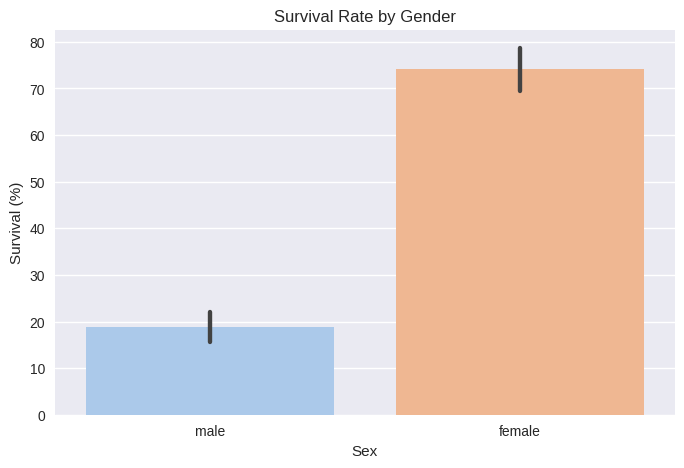

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='Survived', data=train,
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Gender')
plt.ylabel('Survival (%)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


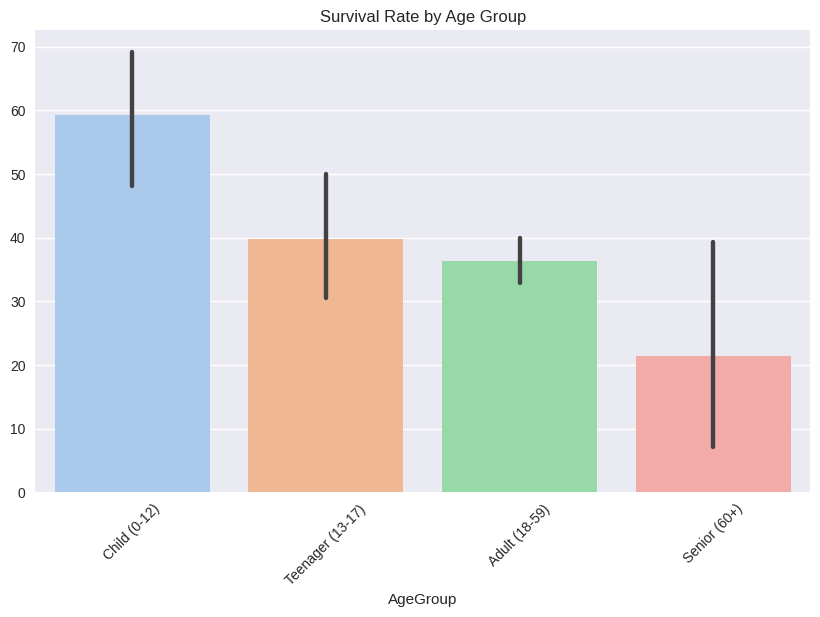

In [30]:
plt.figure(figsize=(10,6))
age_order = ['Child (0-12)', 'Teenager (13-17)', 'Adult (18-59)', 'Senior (60+)']
ax = sns.barplot(x='AgeGroup', y='Survived', data=train, order=age_order,
                estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)
plt.ylabel('')
plt.show()

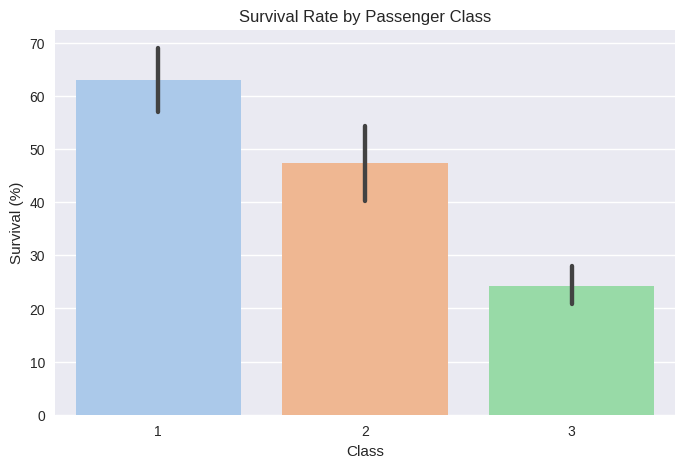

In [31]:
plt.figure(figsize=(8,5))
sns.barplot(x='Pclass', y='Survived', data=train,
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival (%)')
plt.xlabel('Class')
plt.show()

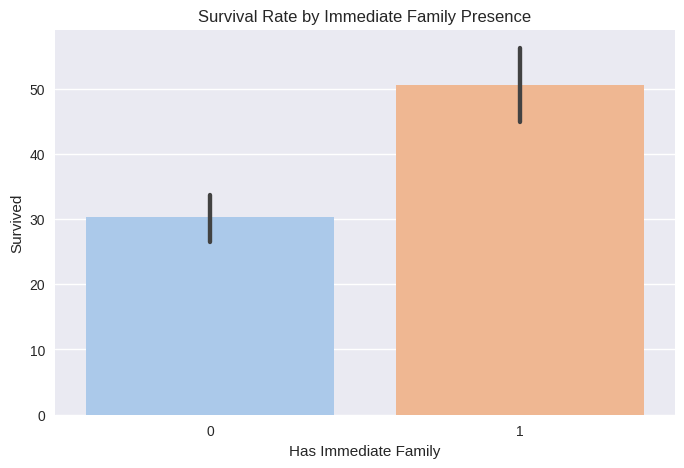

In [32]:
plt.figure(figsize=(8,5))
sns.barplot(x='ImmediateFamily', y='Survived', data=train,
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Survival Rate by Immediate Family Presence')
plt.xlabel('Has Immediate Family')
plt.show()

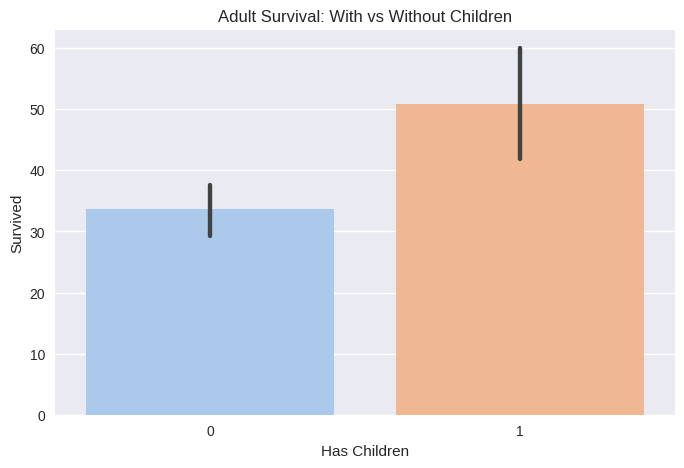

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='HasChildren', y='Survived', 
            data=train[train['AgeGroup'] == 'Adult (18-59)'],
            estimator=lambda x: sum(x)*100/len(x))
plt.title('Adult Survival: With vs Without Children')
plt.xlabel('Has Children')
plt.show()

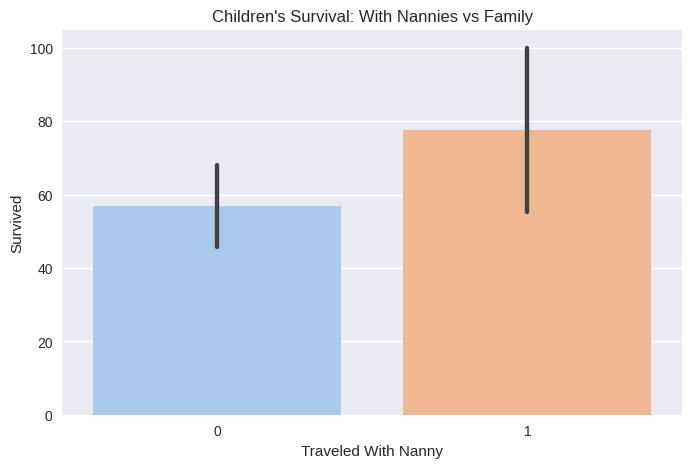

In [34]:
if 'ChildWithNanny' in train.columns:
    plt.figure(figsize=(8,5))
    sns.barplot(x='ChildWithNanny', y='Survived', 
                data=train[train['AgeGroup'] == 'Child (0-12)'],
                estimator=lambda x: sum(x)*100/len(x))
    plt.title('Children\'s Survival: With Nannies vs Family')
    plt.xlabel('Traveled With Nanny')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


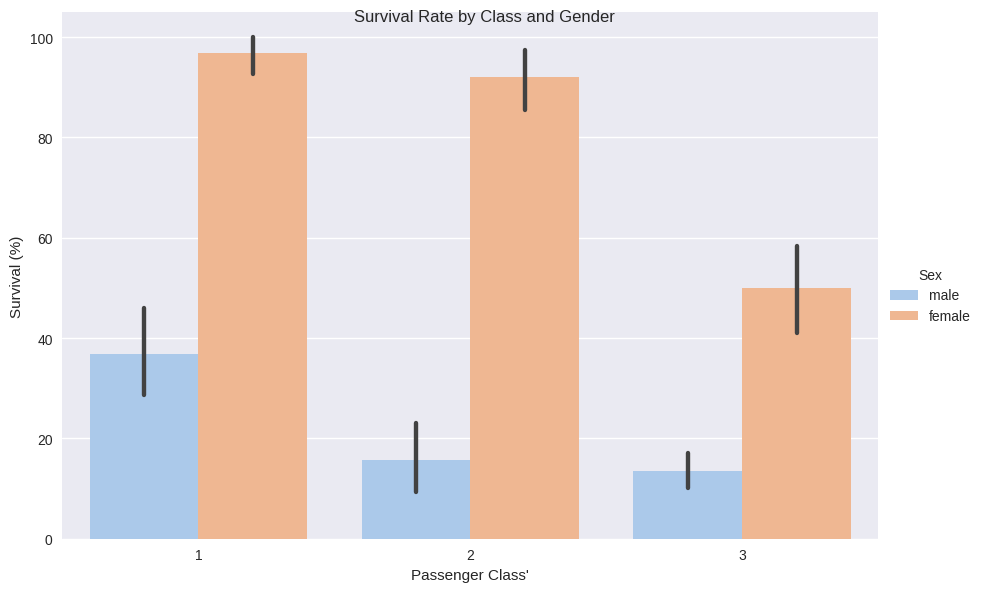

In [35]:
g = sns.catplot(
    x='Pclass',
    y='Survived',
    hue='Sex',
    data=train,
    kind='bar',
    height=6,
    aspect=1.5,
    estimator=lambda x: sum(x)*100/len(x)
)
g.set_axis_labels("Passenger Class'", "Survival (%)")
g.fig.suptitle('Survival Rate by Class and Gender')
plt.show()